La méthode de pénalisation extérieure pour résoudre le problème suivant 

\begin{equation*}
\begin{array}{l}
\text{Minimiser }   3x_1^2+2x_1x_2+2x_2^2-6x_1-9x_2\\[1mm]
-3x_1+6x_2\leqslant 9   \\
-2x_1+\phantom{6}x_2\leqslant 1   \\
x_1,x_2\geqslant 0.
\end{array}
\end{equation*}

In [1]:
using Optim, Plots, Ipopt, JuMP, LinearAlgebra

In [2]:
f(x) = 3x[1]^2+2x[1]*x[2]+2x[2]^2-6x[1]-9x[2]

	
df(x) = [6x[1]+2x[2]-6, 4x[2]+2x[1]-9]

	
function g1(x,y)
	return -3x+6y
end
	
function g2(x,y)
	return -2x+y
end

g2 (generic function with 1 method)

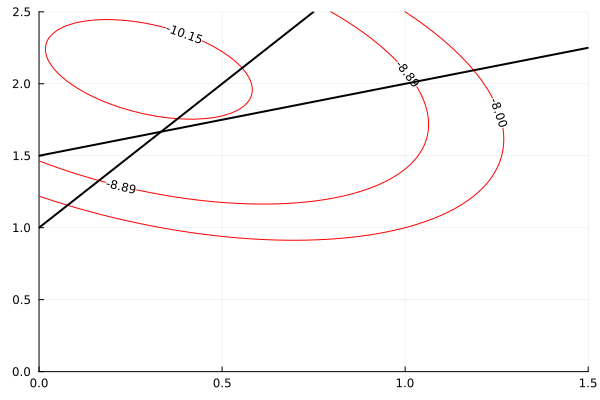

In [3]:
nx = 200
ny = 199
x = range(0,5, length=nx)
y = range(0,5, length=ny)
ff = zeros(nx, ny)

for i in 1:nx
    for j in 1:ny
        ff[i,j] = f([x[i], y[j]])
    end
end


contour(x, y, ff', levels = [-10.15,-8.89, -8], color="red", colorbar = false, contour_labels=true, xlims=(0,1.5), ylims=(0, 2.5))
contour!(x,y,g1, levels=[9], color="black", linewidth=2 )
contour!(x,y, g2, levels=[1], color="black", linewidth=2)

In [4]:
modele = Model(Ipopt.Optimizer)
set_silent(modele)

# définition des variables
@variable(modele, x[1:2] >= 0)

# définition de la fonction objectif
@NLobjective(modele, Min, 3x[1]^2+2x[1]*x[2]+2x[2]^2-6x[1]-9x[2])

# définition des contraintes
@constraint(modele, -3x[1]+6x[2] <= 9)
@constraint(modele, -2x[1]+x[2] <= 1)

# résolution du problème
optimize!(modele);

#affichage de la valeur optimale
@show objective_value(modele)

#affichage de la solution
println("solution = $(value.(x))")


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

objective_value(modele) = -10.125000012513723
solution = [0.49999999678061535, 1.7500000109040321]


In [4]:
μ = .1
ρ = 10
x0 = [0.0, 100]

2-element Vector{Float64}:
   0.0
 100.0

In [5]:
g(x) = [max(0, g1(x[1], x[2])-9)^2, max(0, g2(x[1], x[2])-6)^2, max(0, -x[1])^2, max(0, -x[2])^2]
dg(x) = [2*max(0,g1(x[1],x[2])-9), 2*max(0, g2(x[1], x[2])-6), 2*max(0, -x[1]), 2*max(0, -x[2])]

dg (generic function with 1 method)

In [21]:
# on définit la fonction f(x)+\mu P(x)
fmu(x) = f(x) + μ*sum(g(x))

fmu (generic function with 1 method)

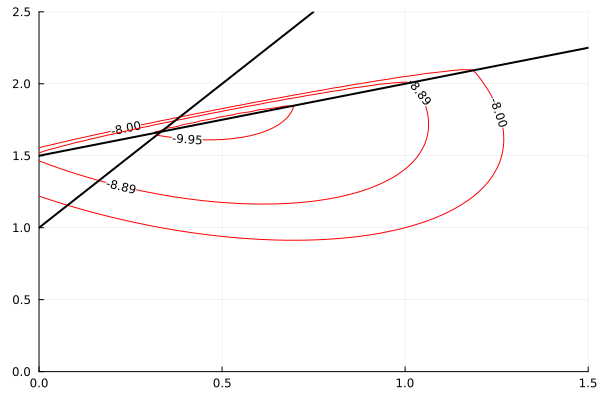

In [22]:
nx = 200
ny = 199
xx = range(0,5, length=nx)
yy = range(0,5, length=ny)
fm = zeros(nx, ny)

for i in 1:nx
    for j in 1:ny
        fm[i,j] = fmu([xx[i], yy[j]])
    end
end


contour(xx, yy, fm', levels = [-9.95,-8.89, -8], color="red", colorbar = false, contour_labels=true, xlims=(0,1.5), ylims=(0, 2.5))
contour!(xx,yy,g1, levels=[9], color="black", linewidth=2 )
contour!(xx,yy, g2, levels=[1], color="black", linewidth=2)

In [23]:
res = Optim.optimize(fmu, x0, LBFGS());

In [24]:
x0 = res.minimizer

2-element Vector{Float64}:
 0.4993846153534484
 1.7510769230694239

In [25]:
# Calcul des multiplicateurs de Lagrange
λ = μ*dg(x0)

4-element Vector{Float64}:
 0.16615384712395098
 0.0
 0.0
 0.0

In [26]:
μ = ρ*μ

100.0

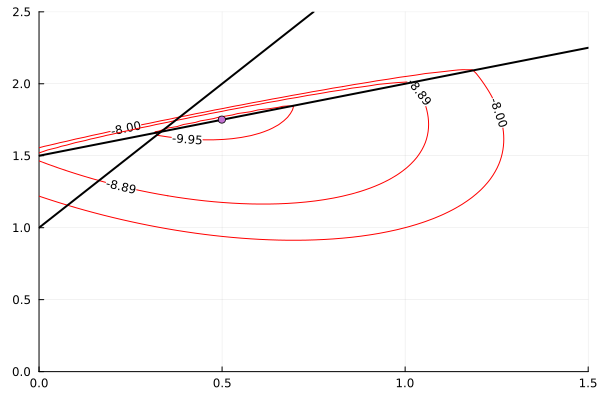

In [27]:
scatter!((x0[1], x0[2]), legend=false)

In [28]:
μ*sum(g(x0))

0.006901775228522319

Méthode de pénalisation extérieure pour résoudre le problème suivant 

\begin{equation*}
\begin{array}{l}
\text{Minimiser }   (x_1-2)^4+(x_1-2x_2)^2\\[1mm]
x_1^2-x_2 = 0.
\end{array}
\end{equation*}

In [29]:
f2(x) = (x[1]-2)^4+(x[1]-2x[2])^2

	
#df(x) = [6x[1]+2x[2]-6, 4x[2]+2x[1]-9]

	
function g1(x,y)
	return x^2-y
end

g1 (generic function with 1 method)

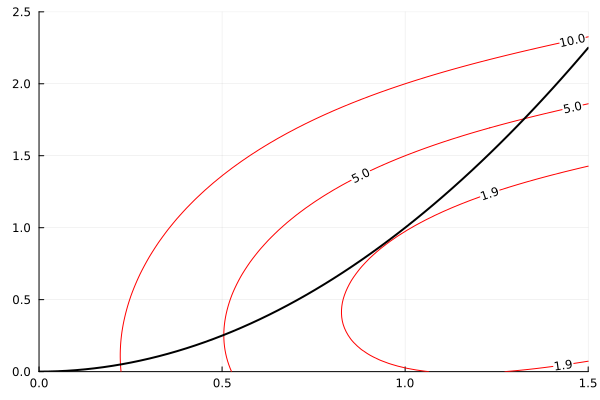

In [30]:
nx = 200
ny = 199
x = range(0,5, length=nx)
y = range(0,5, length=ny)
ff2 = zeros(nx, ny)

for i in 1:nx
    for j in 1:ny
        ff2[i,j] = f2([x[i], y[j]])
    end
end


contour(x, y, ff2', levels = [1.9,5,10], color="red", colorbar = false, contour_labels=true, xlims=(0,1.5), ylims=(0, 2.5))
contour!(x,y,g1, levels=[0], color="black", linewidth=2 )

In [69]:
modele = Model(Ipopt.Optimizer)
set_silent(modele)

# définition des variables
@variable(modele, x[1:2])

# définition de la fonction objectif
@NLobjective(modele, Min, (x[1]-2)^4+(x[1]-2x[2])^2)

# définition des contraintes
@NLconstraint(modele, x[1]^2-x[2] == 0)

# résolution du problème
optimize!(modele);

#affichage de la valeur optimale
@show objective_value(modele)

#affichage de la solution
println("solution = $(value.(x))")

objective_value(modele) = 1.9461837103036448
solution = [0.9455829934427449, 0.8941271974468595]


In [81]:
μ = 1
ρ = 10
x0 = [100, 100.0]
dg(x) = 2*(x[1]^2-x[2])

dg (generic function with 1 method)

In [101]:
f2m(x) = f2(x) + μ*(x[1]^2-x[2])^2

f2m (generic function with 1 method)

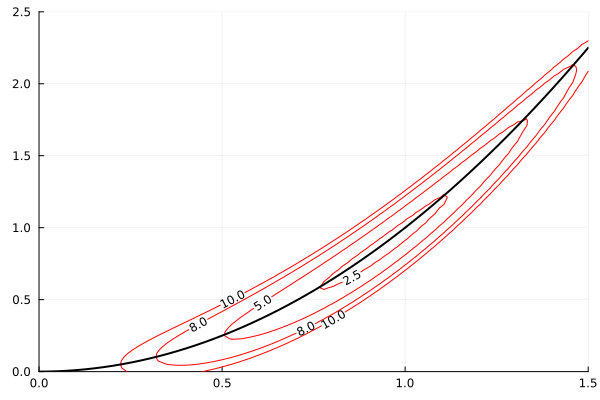

In [102]:
nx = 200
ny = 199
xx = range(0,5, length=nx)
yy = range(0,5, length=ny)
fm2 = zeros(nx, ny)

for i in 1:nx
    for j in 1:ny
        fm2[i,j] = f2m([xx[i], yy[j]])
    end
end


contour(xx, yy, fm2', levels = [2.5,5, 8, 10], color="red", colorbar = false, contour_labels=true, xlims=(0,1.5), ylims=(0, 2.5))
contour!(xx,yy,g1, levels=[0], color="black", linewidth=2 )

In [104]:
res = Optim.optimize(f2m, x0);

In [105]:
x0 = res.minimizer

2-element Vector{Float64}:
 0.9507494760093677
 0.887435958730156

In [106]:
# Calcul des multiplicateurs de Lagrange
λ = μ*dg(x0)

3.2977214803862287

In [107]:
μ = ρ*μ

1000

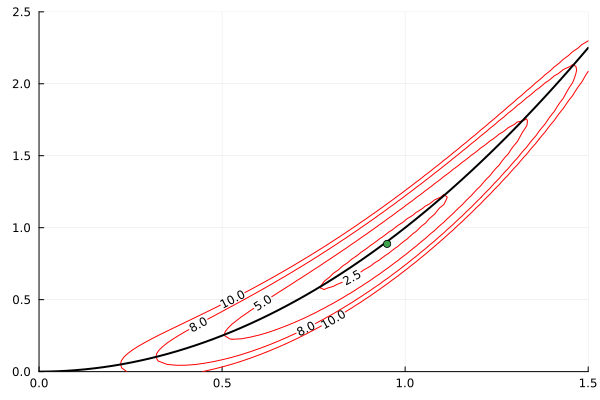

In [108]:
scatter!((x0[1], x0[2]), legend=false)

In [98]:
norm(x0-value.(x))

0.06854891381807662

In [99]:
μ*(x0[1]^2-x0[2])^2

1.928217335963539

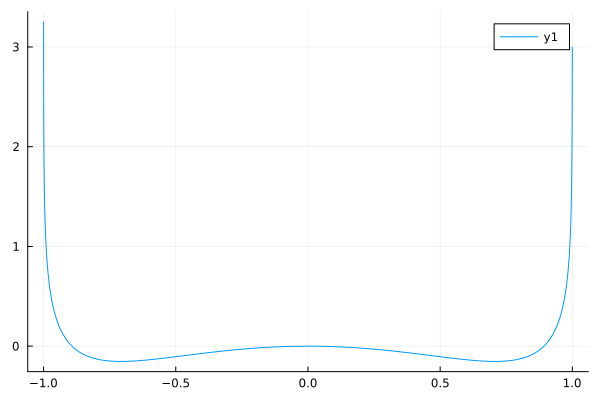

In [100]:
plot(x -> -x^2-.5log(1-x^2))

In [140]:
] add SymPy

   Resolving package versions...
   Installed PyCall ────── v1.94.1
   Installed CommonSolve ─ v0.2.3
   Installed SymPy ─────── v1.1.7
    Updating `~/.julia/environments/v1.8/Project.toml`
  [24249f21] + SymPy v1.1.7
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [38540f10] + CommonSolve v0.2.3
  [438e738f] + PyCall v1.94.1
  [24249f21] + SymPy v1.1.7
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/53b8b07b721b77144a0fbbbc2675222ebf40a02d/build.log`
Precompiling project...
  ✓ CommonSolve
  ✓ PyCall
  ✓ SymPy
  3 dependencies successfully precompiled in 13 seconds. 248 already precompiled.


In [141]:
using SymPy


In [143]:
@vars x

(x,)

In [144]:
h(x) = -x^2-log(1-x^2)

h (generic function with 1 method)

In [149]:
using SymPy

In [150]:
diff(h(x), x)

        2⋅x  
-2⋅x + ──────
            2
       1 - x 

In [154]:
SymPy.derivative(h(x))

LoadError: MethodError: no method matching derivative(::Sym)
[0mClosest candidates are:
[0m  derivative([91m::SymFunction[39m) at ~/.julia/packages/SymPy/7cg6m/src/symfunction.jl:130
[0m  derivative([91m::SymFunction[39m, [91m::Int64[39m) at ~/.julia/packages/SymPy/7cg6m/src/symfunction.jl:130

In [155]:
@vars a b c

(a, b, c)

In [156]:
ϕ(x) = (a*x^2+b*x+c)^2

ϕ (generic function with 1 method)

In [157]:
ϕ(x)

                2
⎛   2          ⎞ 
⎝a⋅x  + b⋅x + c⎠ 

In [160]:
exp = integrate(ϕ(x), (x, 0, 1))

 2                  2           
a    a⋅b   2⋅a⋅c   b           2
── + ─── + ───── + ── + b⋅c + c 
5     2      3     3            

In [165]:
exp2 = simplify(subs(exp, (c, 1-a-b)))

   2                  2        
8⋅a    5⋅a⋅b   4⋅a   b         
──── + ───── - ─── + ── - b + 1
 15      6      3    3         

In [168]:
det(hessian(exp2, (a,b)))

1/60

In [169]:
diff(exp2, (a,b))

  b⎛   2                  2        ⎞
 ∂ ⎜8⋅a    5⋅a⋅b   4⋅a   b         ⎟
───⎜──── + ───── - ─── + ── - b + 1⎟
  b⎝ 15      6      3    3         ⎠
∂a                                  

In [ ]:
jacob